In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FIAP/Data Science/2° ano/Machine Learning/Challenge_3/Databases/clusterizacao.csv', decimal=".")

In [73]:
df.sample(5)

,CD_CLIENTE,DS_PROD,DS_LIN_REC,CIDADE,DS_CNAE,DS_SEGMENTO,DS_SUBSEGMENTO,FAT_FAIXA,MARCA_TOTVS,MODAL_COMERC,...,Kmeans,HDBSCAN,Recencia,Frequencia,Monetario,NPS_RELACIONAL,NPS_TRASIONAL,TICKETS,FAT_FAIXA_MAP,DS_SEGMENTO_MAP
96914,TDC01Y,O12GASFSEP1LM,SOFTWARE COMPLEMENTAR,PALMAS,"Comercio varejista de mercadorias em geral, co...",VAREJO,SUPERMERCADO,Faixa 03 - De 15 M ate 25 M,SOFTWARE COMPLEMENTAR,MODALIDADE TRADICIONAL,...,3,3,276,8,4.456122e+08,7.000000,7.449074,1034.000000,4,3
85773,TB5783,PORTALB2B ATE 1.2M BY AGILE,SAAS SERIE T,CASTANHAL,Comercio varejista de ferragens e ferramentas,VAREJO,MATERIAL DE CONSTRUCAO,"Faixa 00 - Ate 4,5 M",DIGITAL COMMERCE,MODALIDADE ASSINATURA COMPLEMENTAR,...,3,3,184,2,1.681918e+08,8.000000,8.000000,236.000000,1,3
61618,T75330,SMS FULL TOTVS TRAD,SMS TOTVS SERIE T,LAJEADO,Abate de aves,EDUCACIONAL,EDUCACAO CONTINUADA,Faixa 03 - De 15 M ate 25 M,CROSS - TRADICIONAL,MODALIDADE TRADICIONAL,...,3,3,448,2,3.386070e+09,7.800000,8.516667,753.000000,4,7
101078,T84944,CLOUD EXCEDENTE NV INT,CLOUD COMPUTING.,JUNDIAI,Fabricacao de artefatos de material plastico p...,MANUFATURA,PAPEL & CELULOSE,Faixa 03 - De 15 M ate 25 M,CLOUD INTERA,MODALIDADE SERVICOS RECORRENTES,...,2,1,720,0,2.163096e+08,6.011663,7.254207,303.880361,4,2
29751,T16942,CDU FULL TOTVS TRAD,CDU TOTVS SERIE T,CAMPINAS,Holdings de instituicoes nao-financeiras,SERVICOS,PROVEDOR SERVICOS,Sem Informações de Faturamento,CROSS - TRADICIONAL,MODALIDADE TRADICIONAL,...,0,0,547,0,0.000000e+00,6.011663,7.254207,303.880361,0,1


# **Breve Análise Exploratória**

In [24]:
df.describe()

,PAIS,VL_TOTAL_CONTRATO,Kmeans,HDBSCAN,Recencia,Frequencia,Monetario,NPS_RELACIONAL,NPS_TRASIONAL,TICKETS,FAT_FAIXA_MAP,DS_SEGMENTO_MAP
count,238597.000000,2.385970e+05,238597.000000,238597.000000,238597.000000,238597.000000,2.385970e+05,238597.000000,238597.000000,238597.000000,238597.000000,238597.000000
mean,105.910720,3.120108e+03,2.329296,2.246084,445.726593,1.706467,7.644252e+08,6.011663,7.254207,303.880361,4.433115,4.276885
std,23.695716,1.359503e+05,0.934726,1.337256,223.037911,3.251582,1.614845e+09,2.960619,2.576498,307.793060,3.763996,3.205420
min,40.000000,-1.303196e-01,0.000000,-1.000000,151.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000
25%,105.000000,5.212783e+00,2.000000,1.000000,218.000000,0.000000,7.893306e+07,6.011663,7.254207,132.000000,1.000000,2.000000
50%,105.000000,1.773019e+02,3.000000,3.000000,393.000000,1.000000,3.198153e+08,6.011663,7.254207,303.880361,4.000000,3.000000
75%,105.000000,1.050964e+03,3.000000,3.000000,720.000000,2.000000,8.413036e+08,8.000000,8.868421,303.880361,8.000000,7.000000
max,845.000000,3.558788e+07,3.000000,4.000000,720.000000,60.000000,4.314858e+10,10.000000,10.000000,8713.000000,12.000000,14.000000


In [46]:
# Criando MAP para melhor legibilidade nos gráficos
map_faixas = {
    'Sem Informações de Faturamento': 0,
    'Faixa 00 - Ate 4,5 M': 1,
    'Faixa 01 - De 4,5 M ate 7,5 M': 2,
    'Faixa 02 - De 7,5 M ate 15 M': 3,
    'Faixa 03 - De 15 M ate 25 M': 4,
    'Faixa 04 - De 25 M ate 35 M': 5,
    'Faixa 05 - De 35 M ate 50 M': 6,
    'Faixa 06 - De 50 M ate 75 M': 7,
    'Faixa 07 - De 75 M ate 150 M': 8,
    'Faixa 08 - De 150 M ate 300 M': 9,
    'Faixa 09 - De 300 M ate 500 M': 10,
    'Faixa 10 - De 500 M ate 850 M': 11,
    'Faixa 11 - Acima de 850 M': 12
}

df["FAT_FAIXA_MAP"] = df["FAT_FAIXA"].map(map_faixas)

# **Análise Geral Sobre os Clusters**

In [121]:
df_unicos = df.drop_duplicates(subset=['HDBSCAN', 'CD_CLIENTE'])

In [123]:
df_unicos['HDBSCAN'].value_counts()

,count
HDBSCAN,
1,3816
0,2485
4,1785
3,1689
2,827
-1,13


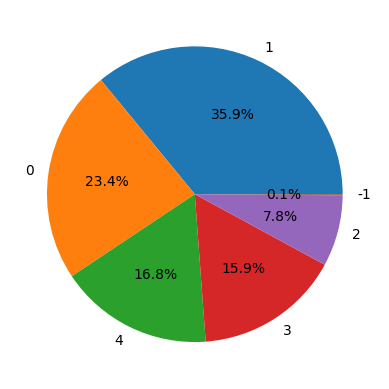

In [126]:
# Contagem de clientes únicos por cluster
contagem = df_unicos['HDBSCAN'].value_counts()

# Gráfico de pizza
contagem.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')  # remove o label do eixo y
plt.show()

# **Cluster 0**

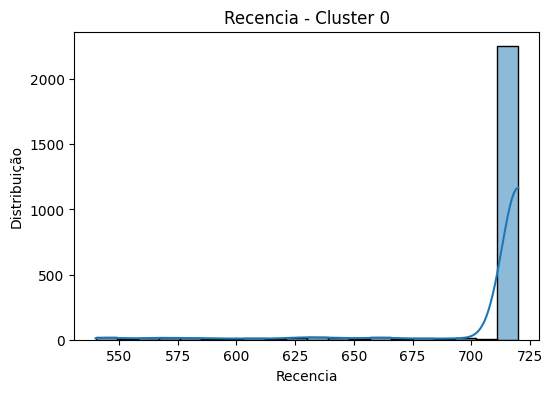

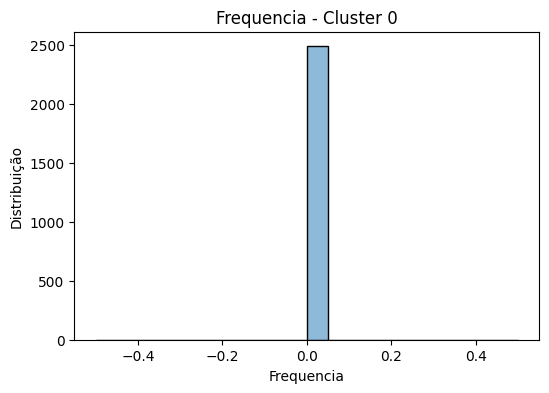

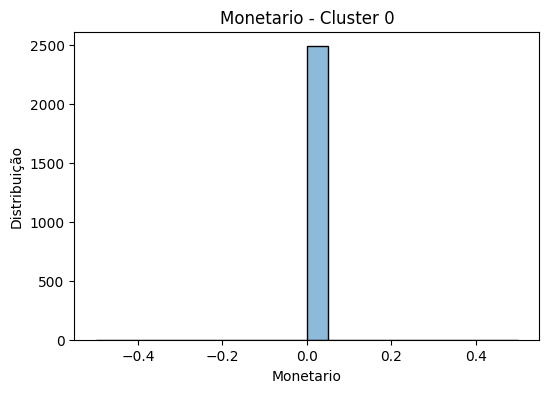

In [127]:
# Analisando distribuição variáveis chave para clusterização
variaveis = ['Recencia', 'Frequencia', 'Monetario']
cluster = 0

df_cluster = df_unicos[df_unicos['HDBSCAN'] == cluster]

for var in variaveis:
    plt.figure(figsize=(6,4))
    sns.histplot(df_cluster[var], bins=20, kde=True, edgecolor="black")
    plt.title(f"{var} - Cluster {cluster}")
    plt.xlabel(var)
    plt.ylabel("Distribuição")
    plt.show()

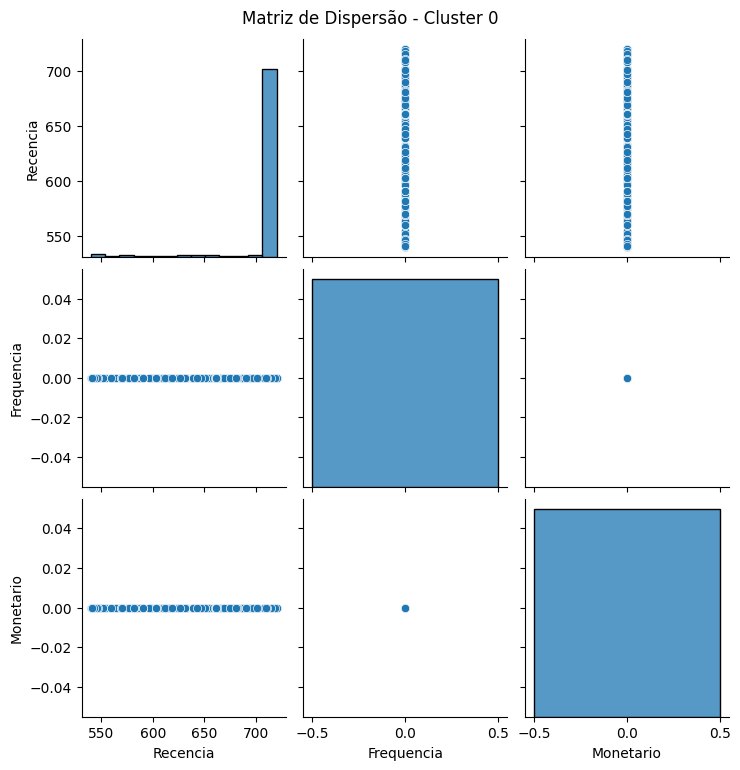

In [128]:
# Dispersões das variáveis chave do cluster 0
variaveis = ['Recencia', 'Frequencia', 'Monetario']
cluster = 0

df_cluster = df_unicos[df_unicos['HDBSCAN'] == cluster]

# Pairplot só para o cluster 0
sns.pairplot(df_cluster[variaveis])

plt.suptitle("Matriz de Dispersão - Cluster 0", y=1.02)
plt.show()

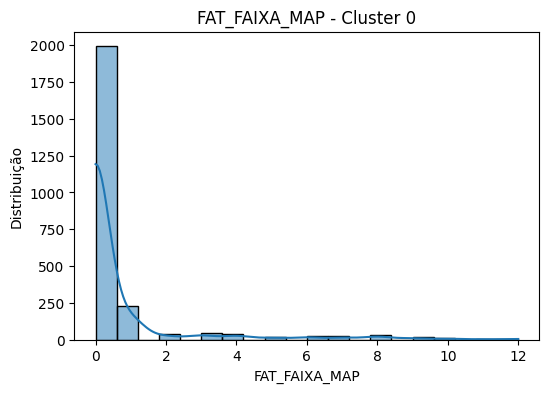

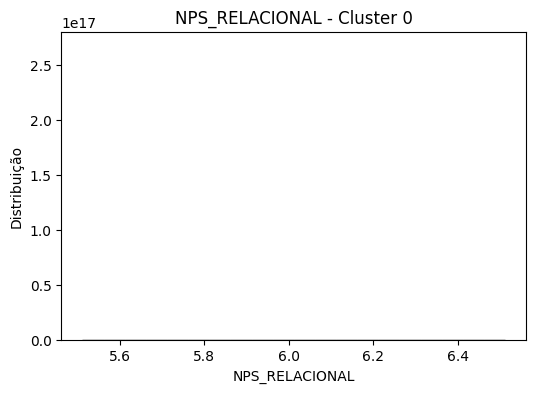

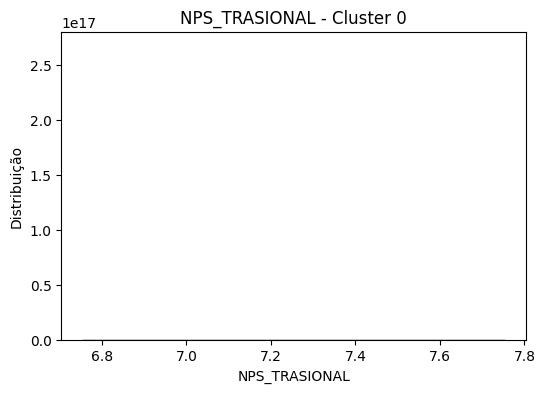

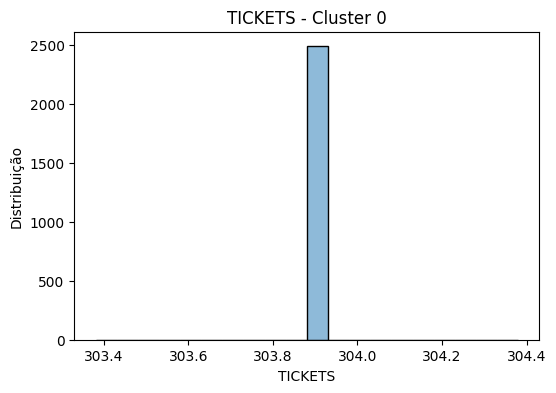

In [129]:
# Analisando outras variáveis chave para o negócio
variaveis = ['FAT_FAIXA_MAP', 'NPS_RELACIONAL', 'NPS_TRASIONAL', 'TICKETS']
cluster = 0

for var in variaveis:
    plt.figure(figsize=(6,4))
    sns.histplot(df_cluster[var], bins=20, kde=True, edgecolor="black")
    plt.title(f"{var} - Cluster {cluster}")
    plt.xlabel(var)
    plt.ylabel("Distribuição")
    plt.show()

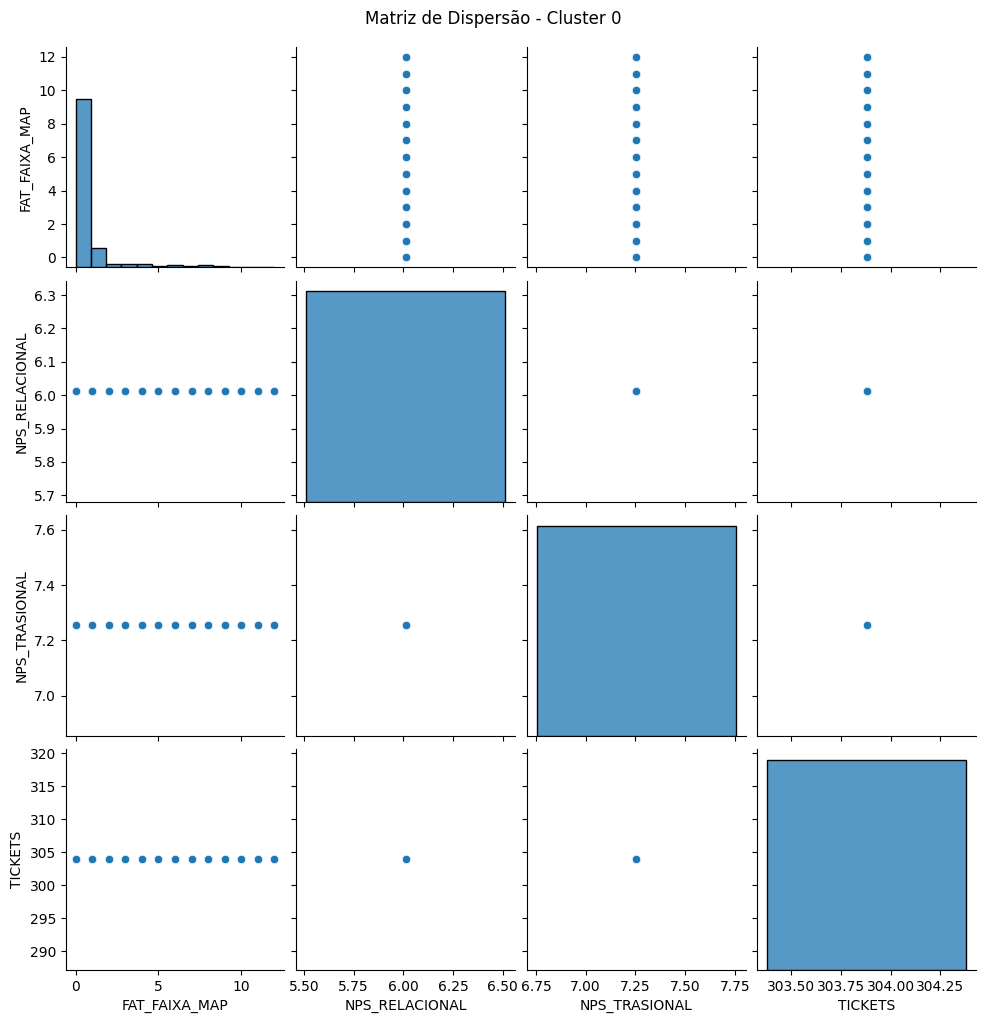

In [130]:
# Dispersões das outras variáveis chave para o negócio do cluster 0
variaveis = ['FAT_FAIXA_MAP', 'NPS_RELACIONAL', 'NPS_TRASIONAL', 'TICKETS']
cluster = 0

df_cluster = df_unicos[df_unicos['HDBSCAN'] == cluster]

sns.pairplot(df_cluster[variaveis])

plt.suptitle("Matriz de Dispersão - Cluster 0", y=1.02)
plt.show()

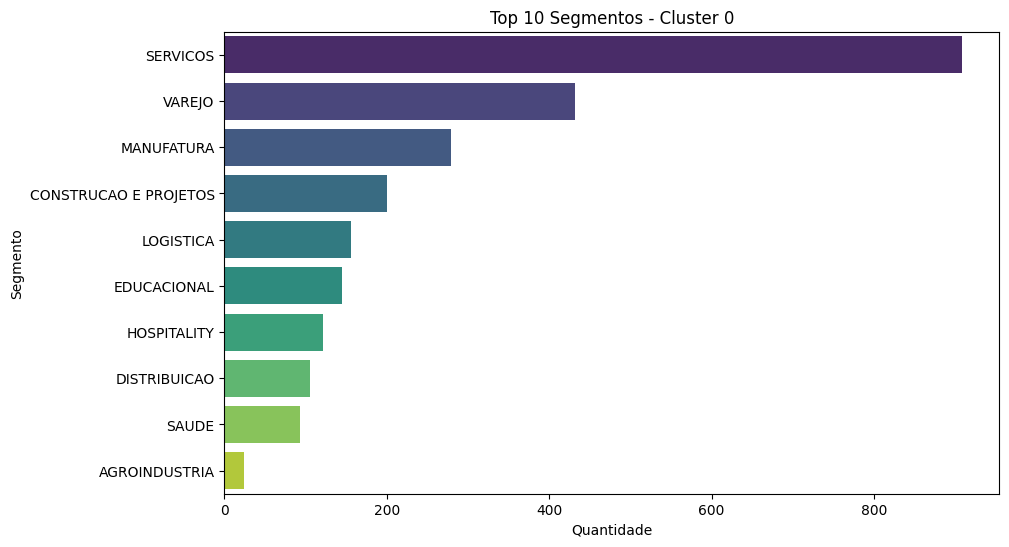

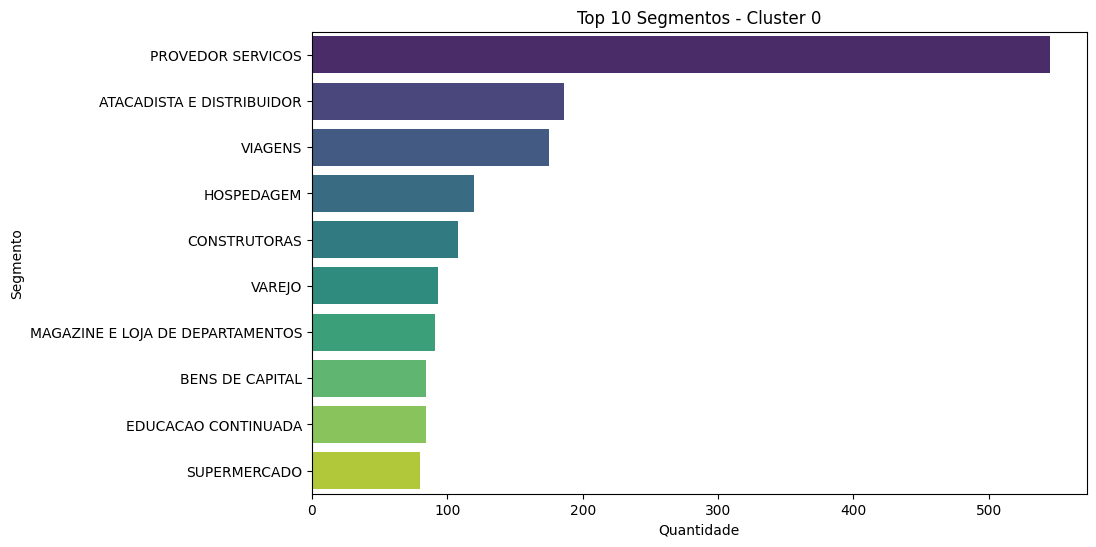

In [131]:
cluster = 0
df_cluster = df_unicos[df_unicos['HDBSCAN'] == cluster]

# Top 10 segmentos mais recorrentes
top10 = df_cluster['DS_SEGMENTO'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10.values, y=top10.index, palette="viridis")

plt.title(f"Top 10 Segmentos - Cluster {cluster}")
plt.xlabel("Quantidade")
plt.ylabel("Segmento")
plt.show()

# Top 10 subsegmentos mais recorrentes
top10 = df_cluster['DS_SUBSEGMENTO'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10.values, y=top10.index, palette="viridis")

plt.title(f"Top 10 Segmentos - Cluster {cluster}")
plt.xlabel("Quantidade")
plt.ylabel("Segmento")
plt.show()

# **Cluster 1**

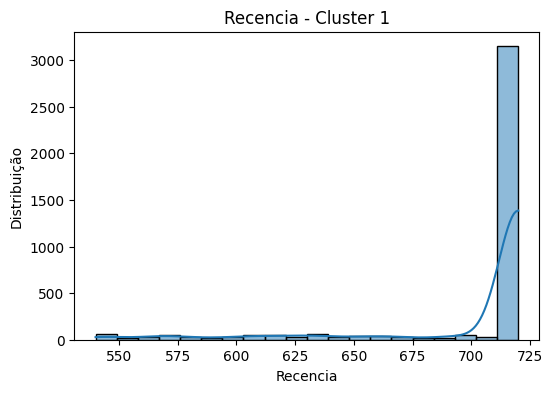

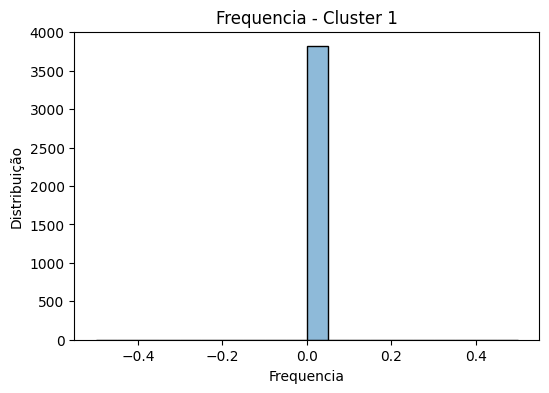

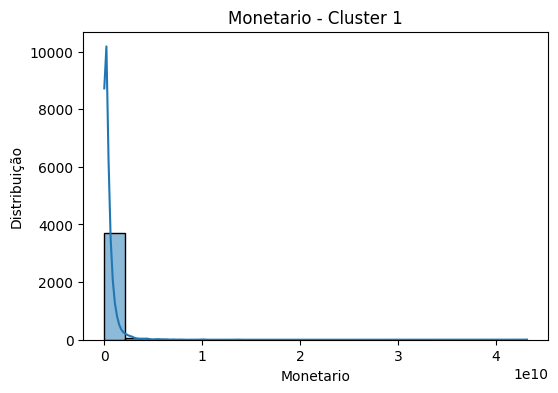

In [132]:
# Analisando distribuição variáveis chave para clusterização
variaveis = ['Recencia', 'Frequencia', 'Monetario']
cluster = 1

df_cluster = df_unicos[df_unicos['HDBSCAN'] == cluster]

for var in variaveis:
    plt.figure(figsize=(6,4))
    sns.histplot(df_cluster[var], bins=20, kde=True, edgecolor="black")
    plt.title(f"{var} - Cluster {cluster}")
    plt.xlabel(var)
    plt.ylabel("Distribuição")
    plt.show()

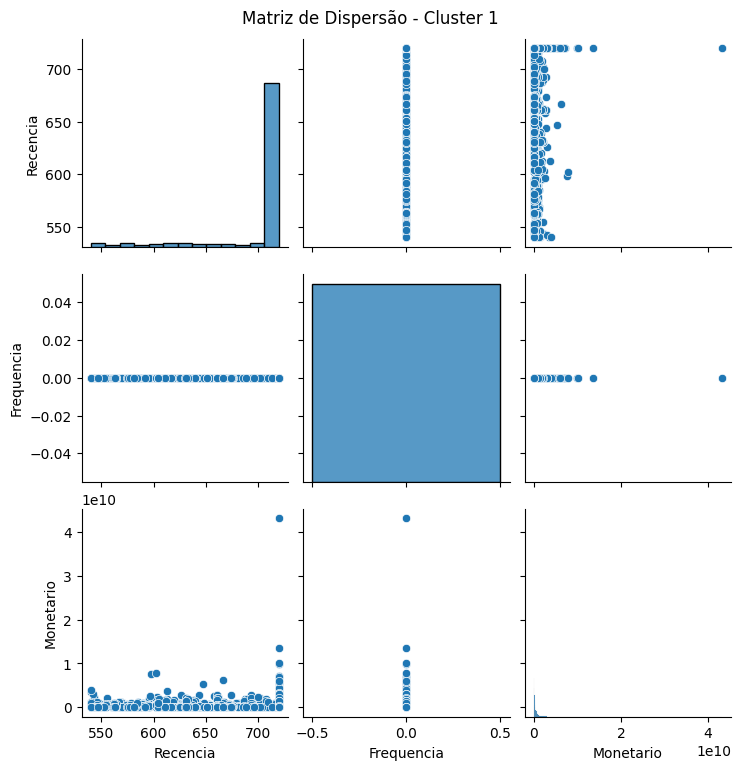

In [147]:
# Dispersões das variáveis chave do cluster 1
variaveis = ['Recencia', 'Frequencia', 'Monetario']
cluster = 1

df_cluster = df_unicos[df_unicos['HDBSCAN'] == cluster]

# Pairplot só para o cluster 1
sns.pairplot(df_cluster[variaveis])

plt.suptitle("Matriz de Dispersão - Cluster 1", y=1.02)
plt.show()

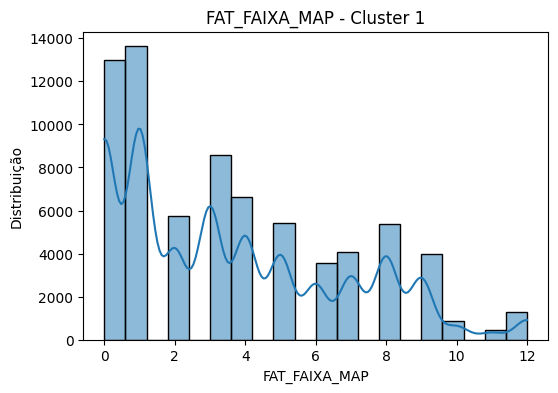

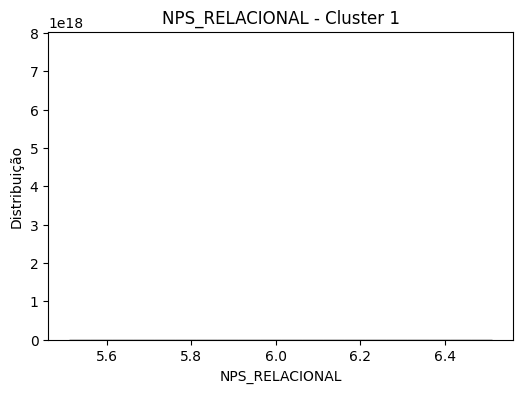

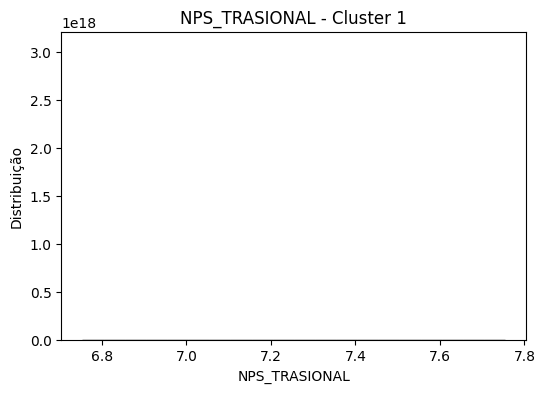

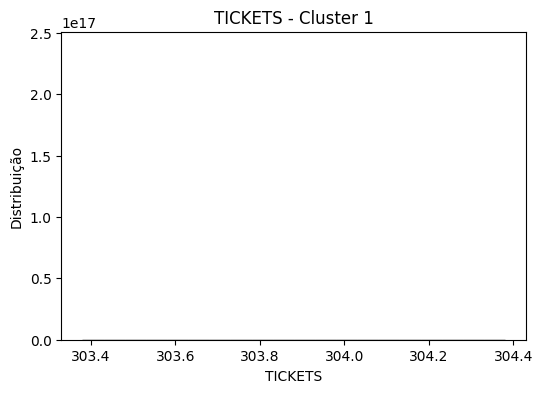

In [134]:
# Analisando outras variáveis chave para o negócio
variaveis = ['FAT_FAIXA_MAP', 'NPS_RELACIONAL', 'NPS_TRASIONAL', 'TICKETS']
cluster = 1

for var in variaveis:
    plt.figure(figsize=(6,4))
    sns.histplot(df_cluster[var], bins=20, kde=True, edgecolor="black")
    plt.title(f"{var} - Cluster {cluster}")
    plt.xlabel(var)
    plt.ylabel("Distribuição")
    plt.show()

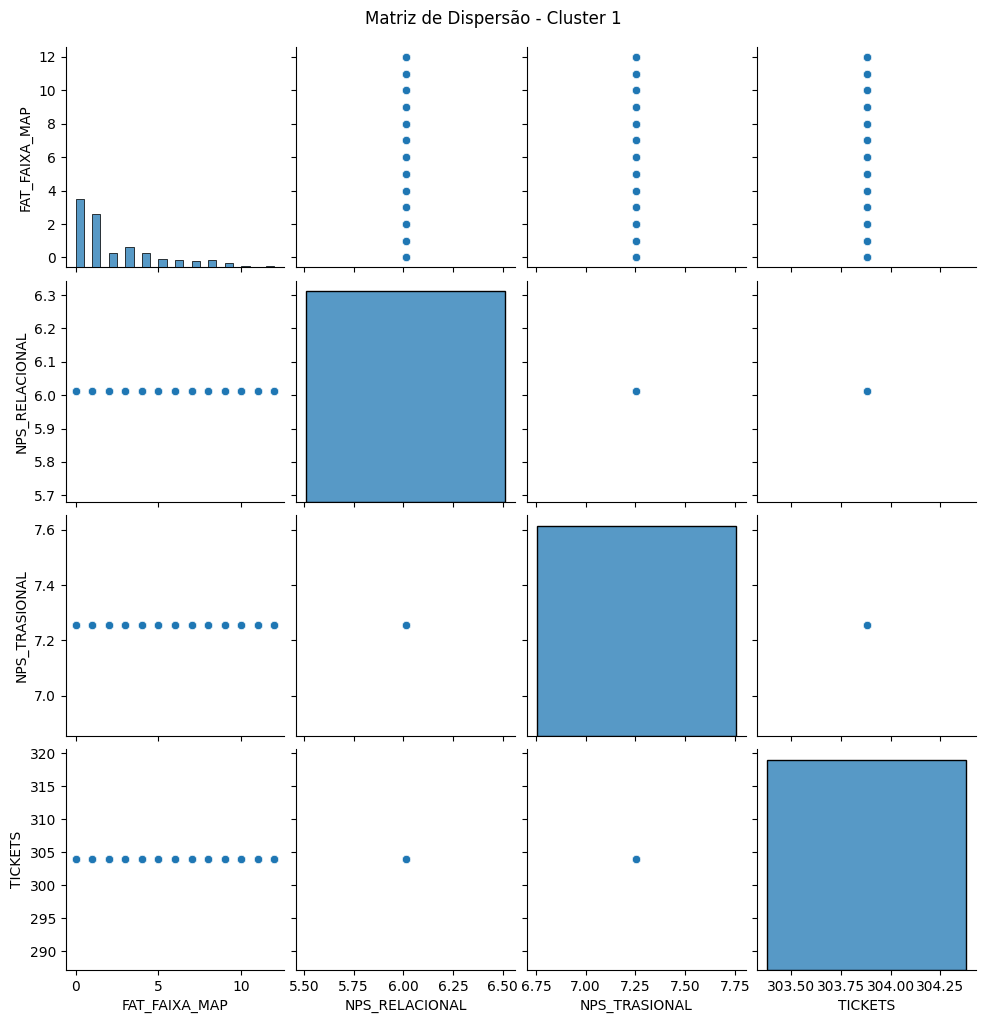

In [146]:
# Dispersões das outras variáveis chave para o negócio do cluster 1
variaveis = ['FAT_FAIXA_MAP', 'NPS_RELACIONAL', 'NPS_TRASIONAL', 'TICKETS']
cluster = 1

df_cluster = df_unicos[df_unicos['HDBSCAN'] == cluster]

sns.pairplot(df_cluster[variaveis])

plt.suptitle("Matriz de Dispersão - Cluster 1", y=1.02)
plt.show()

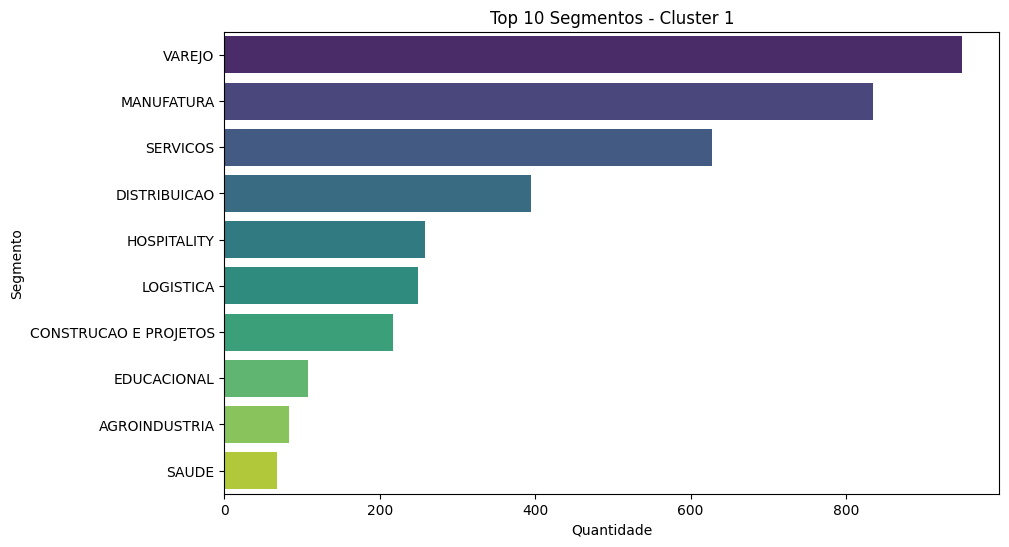

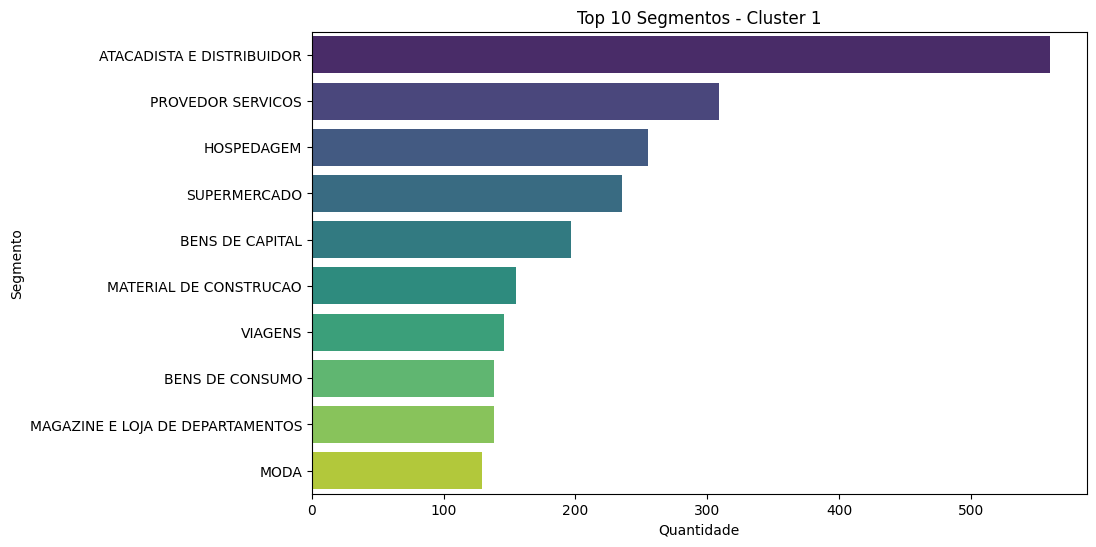

In [136]:
cluster = 1
df_cluster = df_unicos[df_unicos['HDBSCAN'] == cluster]

# Top 10 segmentos mais recorrentes
top10 = df_cluster['DS_SEGMENTO'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10.values, y=top10.index, palette="viridis")

plt.title(f"Top 10 Segmentos - Cluster {cluster}")
plt.xlabel("Quantidade")
plt.ylabel("Segmento")
plt.show()

# Top 10 subsegmentos mais recorrentes
top10 = df_cluster['DS_SUBSEGMENTO'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10.values, y=top10.index, palette="viridis")

plt.title(f"Top 10 Segmentos - Cluster {cluster}")
plt.xlabel("Quantidade")
plt.ylabel("Segmento")
plt.show()

# **Cluster 2**

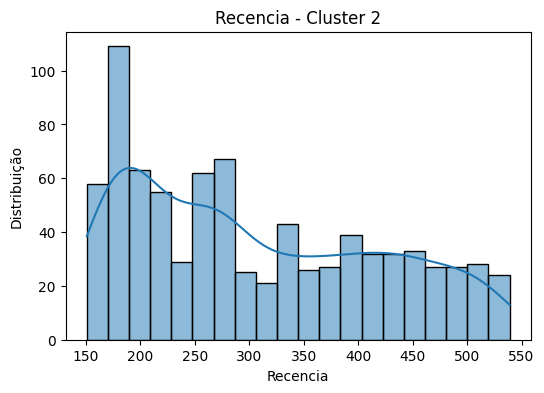

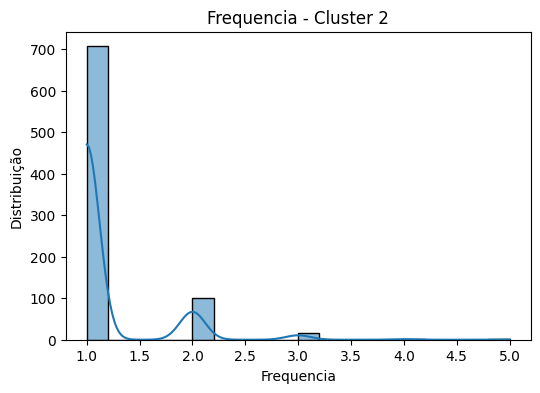

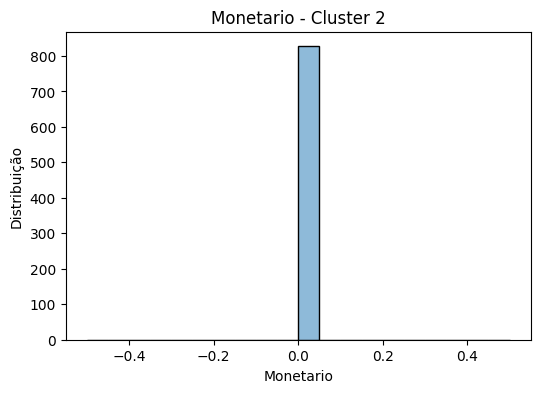

In [137]:
# Analisando distribuição variáveis chave para clusterização
variaveis = ['Recencia', 'Frequencia', 'Monetario']
cluster = 2

df_cluster = df_unicos[df_unicos['HDBSCAN'] == cluster]

for var in variaveis:
    plt.figure(figsize=(6,4))
    sns.histplot(df_cluster[var], bins=20, kde=True, edgecolor="black")
    plt.title(f"{var} - Cluster {cluster}")
    plt.xlabel(var)
    plt.ylabel("Distribuição")
    plt.show()

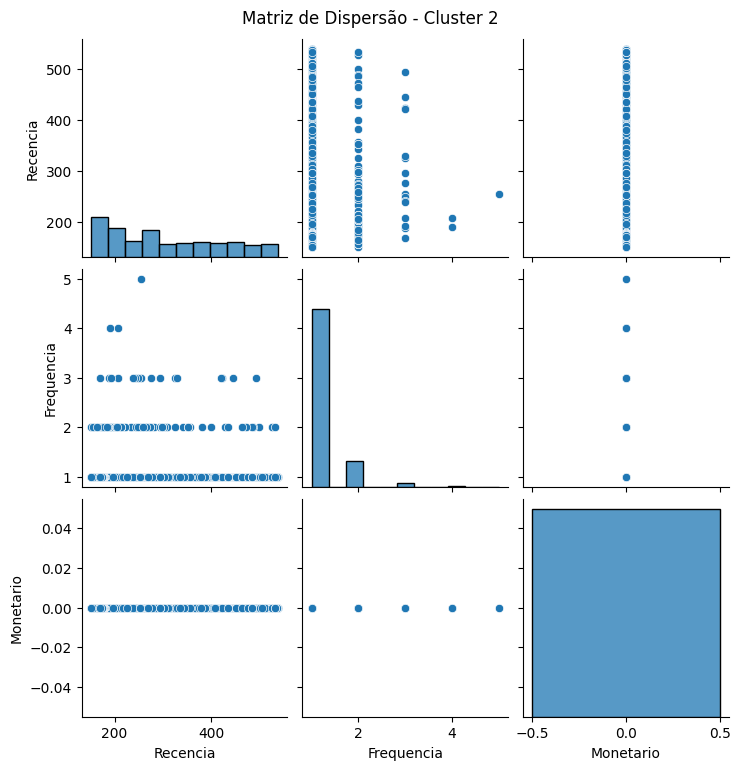

In [138]:
# Dispersões das variáveis chave do cluster 2
variaveis = ['Recencia', 'Frequencia', 'Monetario']
cluster = 2

df_cluster = df_unicos[df_unicos['HDBSCAN'] == cluster]

# Pairplot só para o cluster 2
sns.pairplot(df_cluster[variaveis])

plt.suptitle("Matriz de Dispersão - Cluster 2", y=1.02)
plt.show()

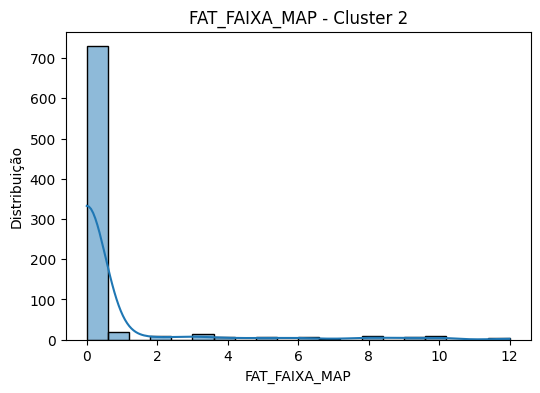

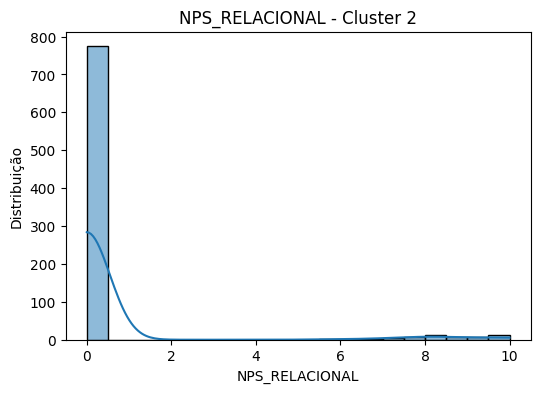

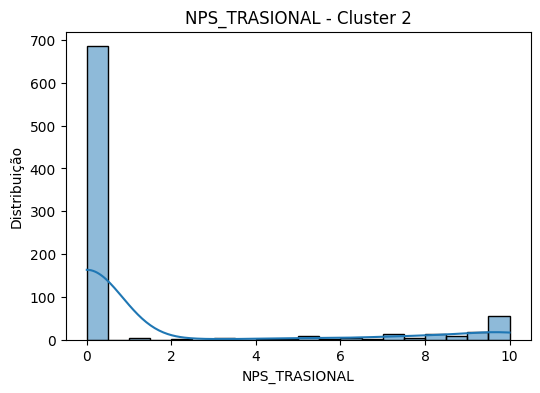

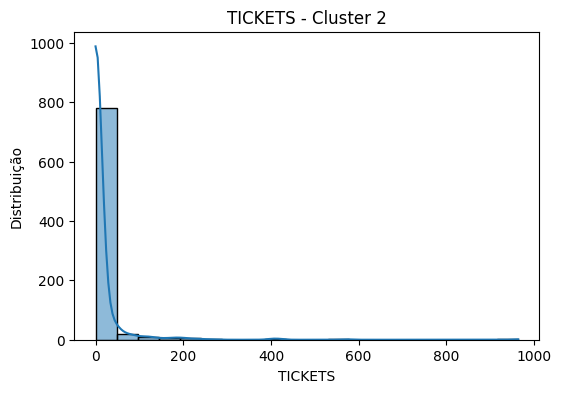

In [139]:
# Analisando outras variáveis chave para o negócio
variaveis = ['FAT_FAIXA_MAP', 'NPS_RELACIONAL', 'NPS_TRASIONAL', 'TICKETS']
cluster = 2

for var in variaveis:
    plt.figure(figsize=(6,4))
    sns.histplot(df_cluster[var], bins=20, kde=True, edgecolor="black")
    plt.title(f"{var} - Cluster {cluster}")
    plt.xlabel(var)
    plt.ylabel("Distribuição")
    plt.show()

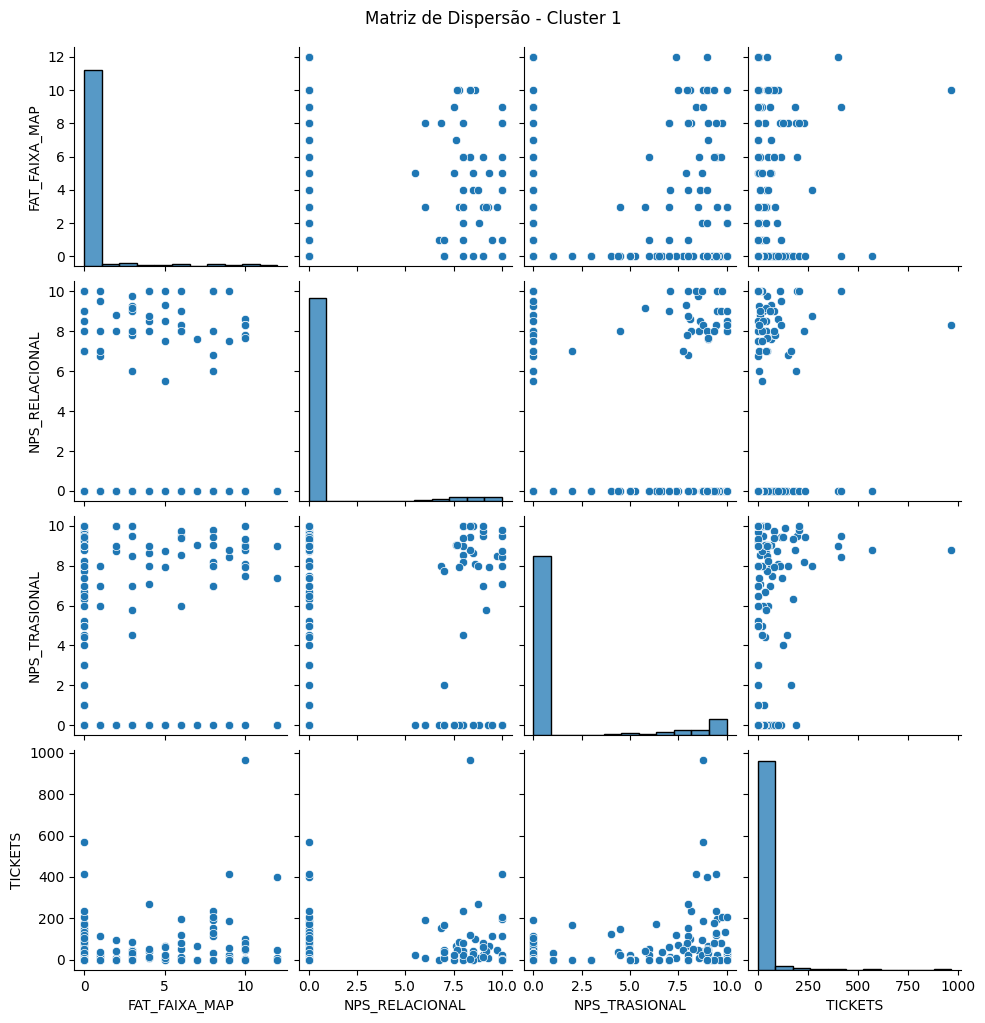

In [145]:
# Dispersões das outras variáveis chave para o negócio do cluster 2
variaveis = ['FAT_FAIXA_MAP', 'NPS_RELACIONAL', 'NPS_TRASIONAL', 'TICKETS']
cluster = 2

df_cluster = df_unicos[df_unicos['HDBSCAN'] == cluster]

sns.pairplot(df_cluster[variaveis])

plt.suptitle("Matriz de Dispersão - Cluster 1", y=1.02)
plt.show()

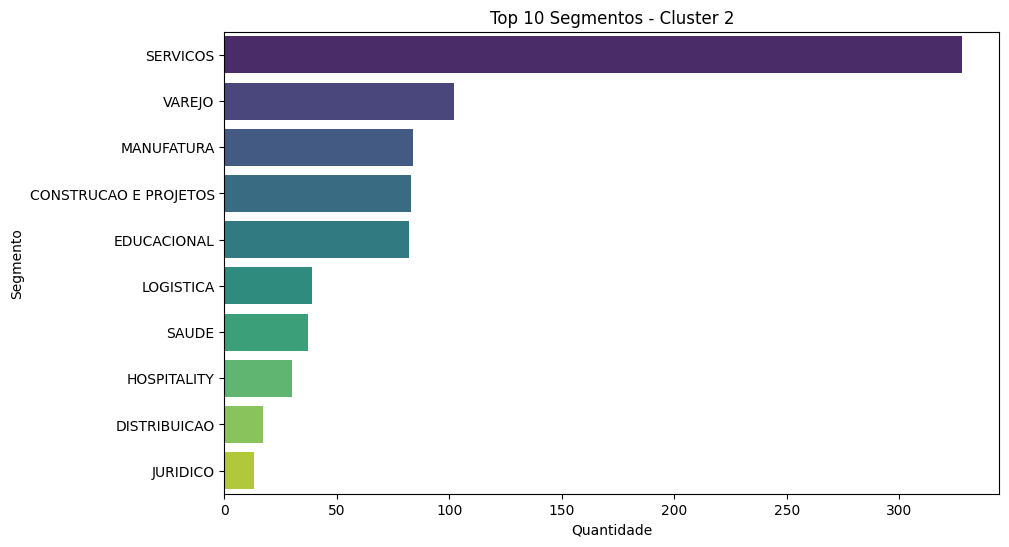

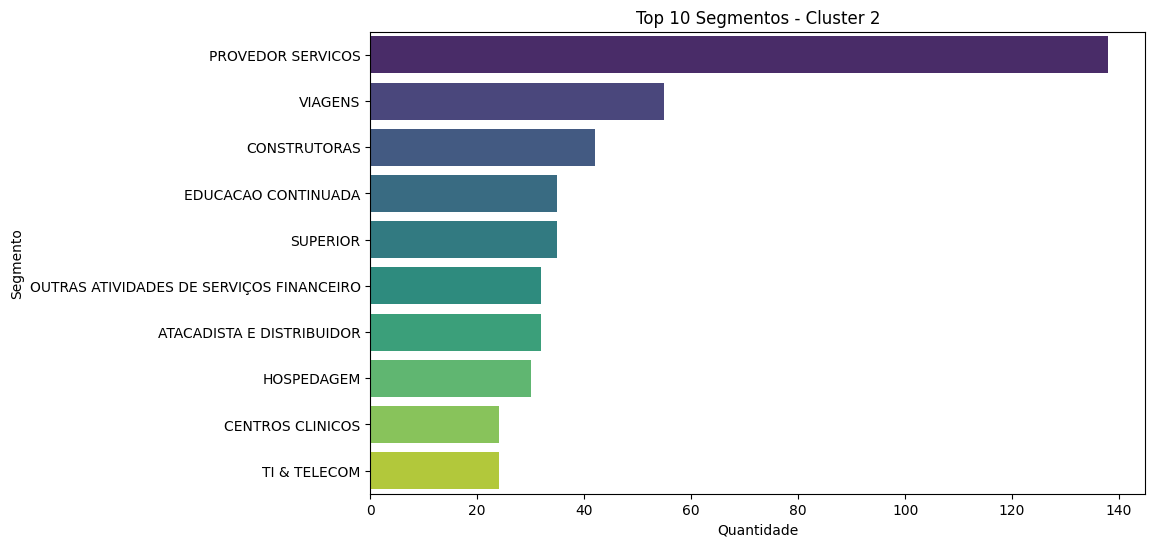

In [141]:
cluster = 2
df_cluster = df_unicos[df_unicos['HDBSCAN'] == cluster]

# Top 10 segmentos mais recorrentes
top10 = df_cluster['DS_SEGMENTO'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10.values, y=top10.index, palette="viridis")

plt.title(f"Top 10 Segmentos - Cluster {cluster}")
plt.xlabel("Quantidade")
plt.ylabel("Segmento")
plt.show()

# Top 10 subsegmentos mais recorrentes
top10 = df_cluster['DS_SUBSEGMENTO'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10.values, y=top10.index, palette="viridis")

plt.title(f"Top 10 Segmentos - Cluster {cluster}")
plt.xlabel("Quantidade")
plt.ylabel("Segmento")
plt.show()

# **Cluster 3**

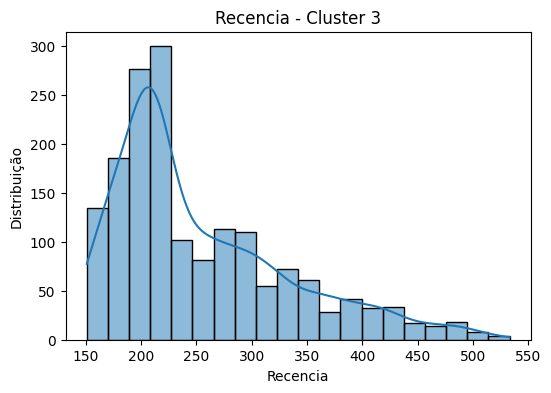

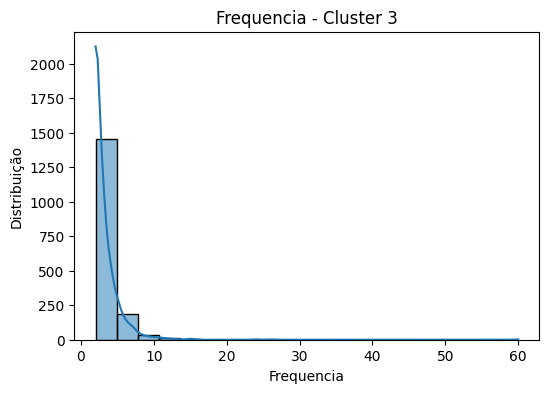

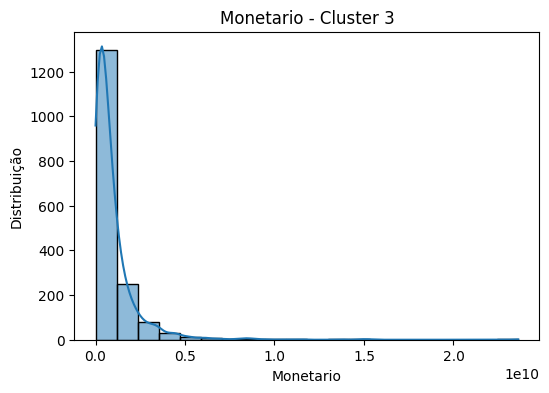

In [142]:
# Analisando distribuição variáveis chave para clusterização
variaveis = ['Recencia', 'Frequencia', 'Monetario']
cluster = 3

df_cluster = df_unicos[df_unicos['HDBSCAN'] == cluster]

for var in variaveis:
    plt.figure(figsize=(6,4))
    sns.histplot(df_cluster[var], bins=20, kde=True, edgecolor="black")
    plt.title(f"{var} - Cluster {cluster}")
    plt.xlabel(var)
    plt.ylabel("Distribuição")
    plt.show()

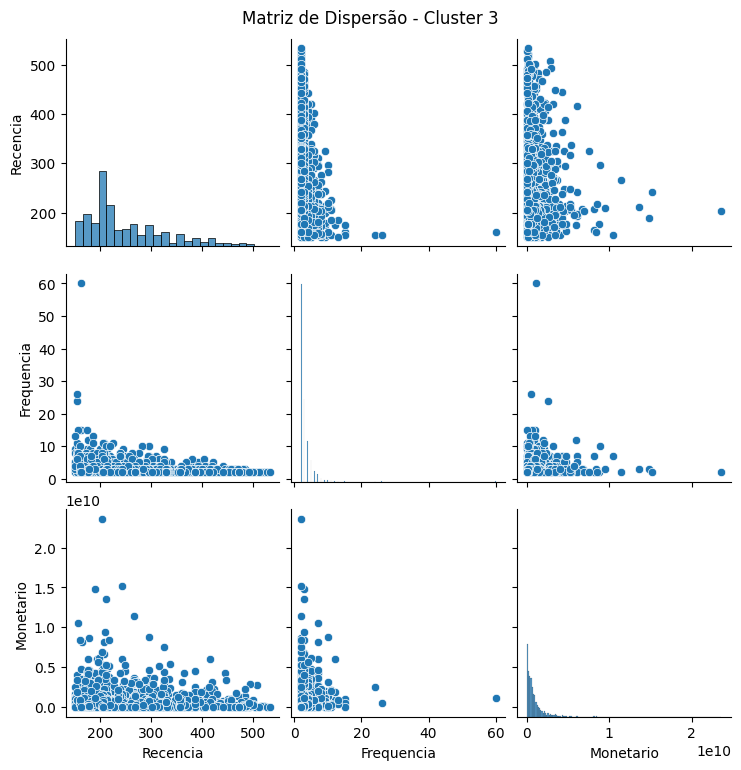

In [144]:
# Dispersões das variáveis chave do cluster 3
variaveis = ['Recencia', 'Frequencia', 'Monetario']
cluster = 3

df_cluster = df_unicos[df_unicos['HDBSCAN'] == cluster]

# Pairplot só para o cluster 3
sns.pairplot(df_cluster[variaveis])

plt.suptitle("Matriz de Dispersão - Cluster 3", y=1.02)
plt.show()

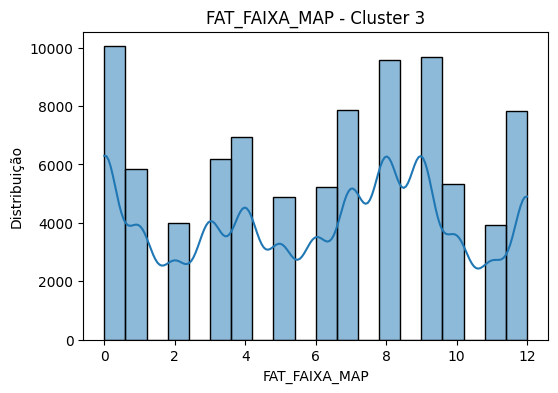

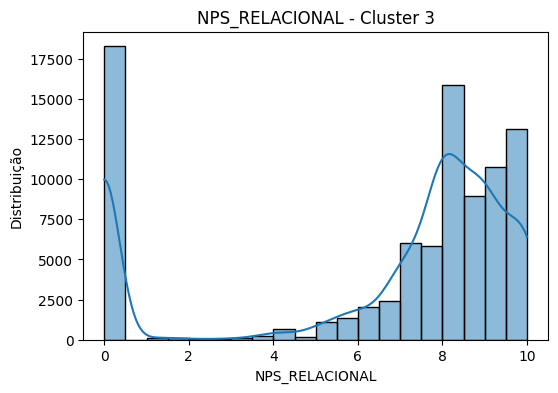

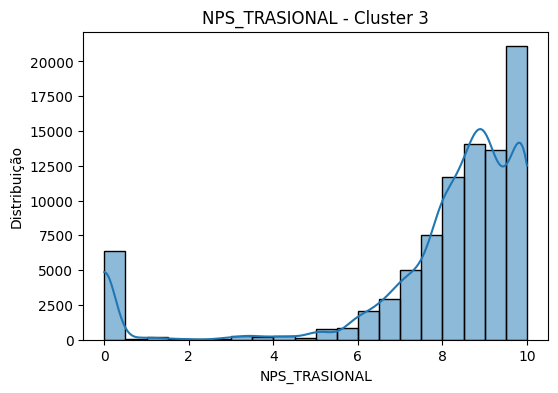

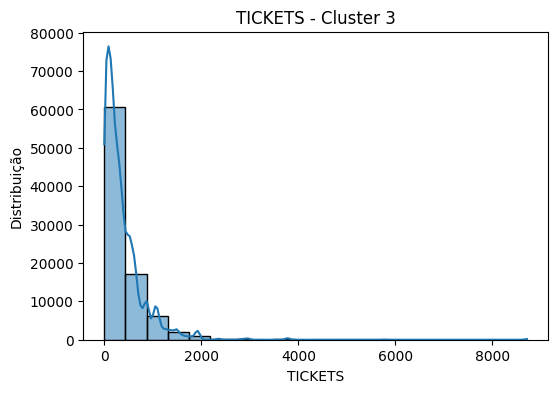

In [77]:
# Analisando outras variáveis chave para o negócio
variaveis = ['FAT_FAIXA_MAP', 'NPS_RELACIONAL', 'NPS_TRASIONAL', 'TICKETS']
cluster = 3

for var in variaveis:
    plt.figure(figsize=(6,4))
    sns.histplot(df_cluster[var], bins=20, kde=True, edgecolor="black")
    plt.title(f"{var} - Cluster {cluster}")
    plt.xlabel(var)
    plt.ylabel("Distribuição")
    plt.show()

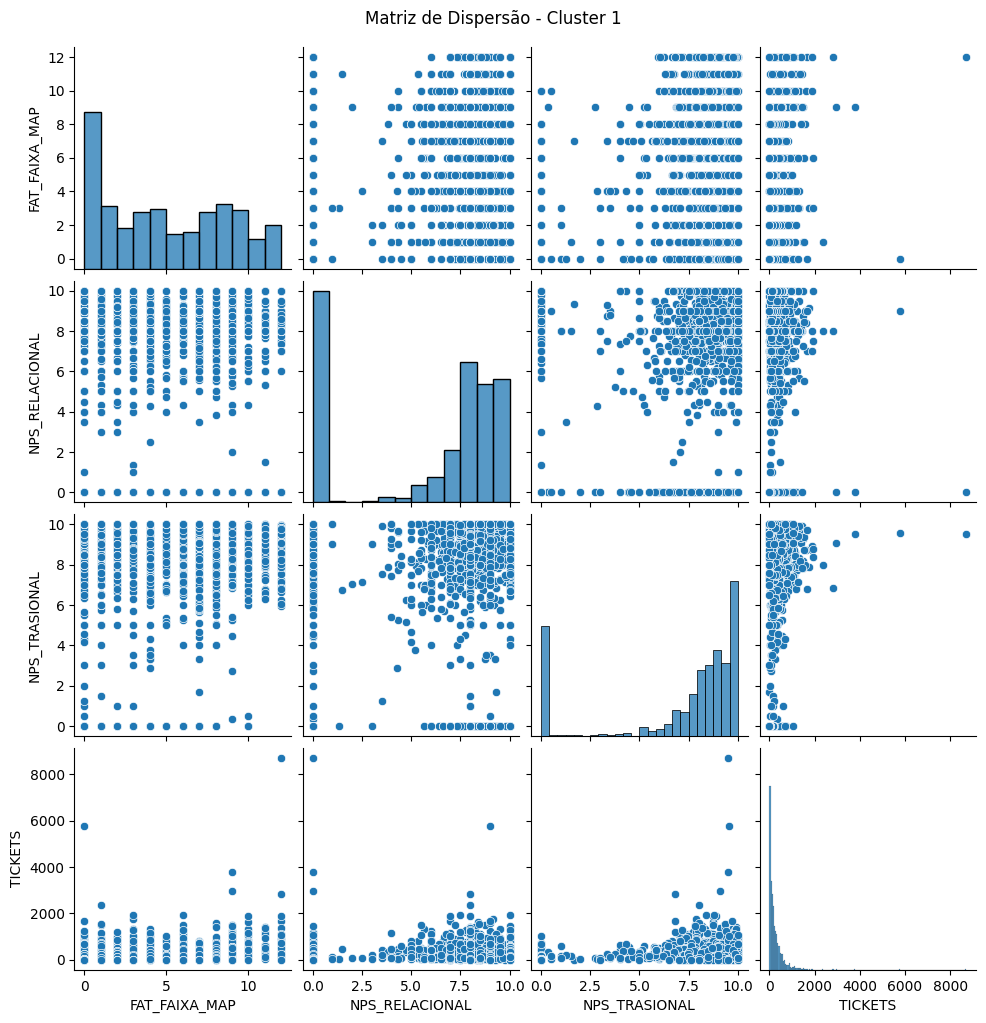

In [148]:
# Dispersões das outras variáveis chave para o negócio do cluster 3
variaveis = ['FAT_FAIXA_MAP', 'NPS_RELACIONAL', 'NPS_TRASIONAL', 'TICKETS']
cluster = 3

df_cluster = df_unicos[df_unicos['HDBSCAN'] == cluster]

sns.pairplot(df_cluster[variaveis])

plt.suptitle("Matriz de Dispersão - Cluster 1", y=1.02)
plt.show()

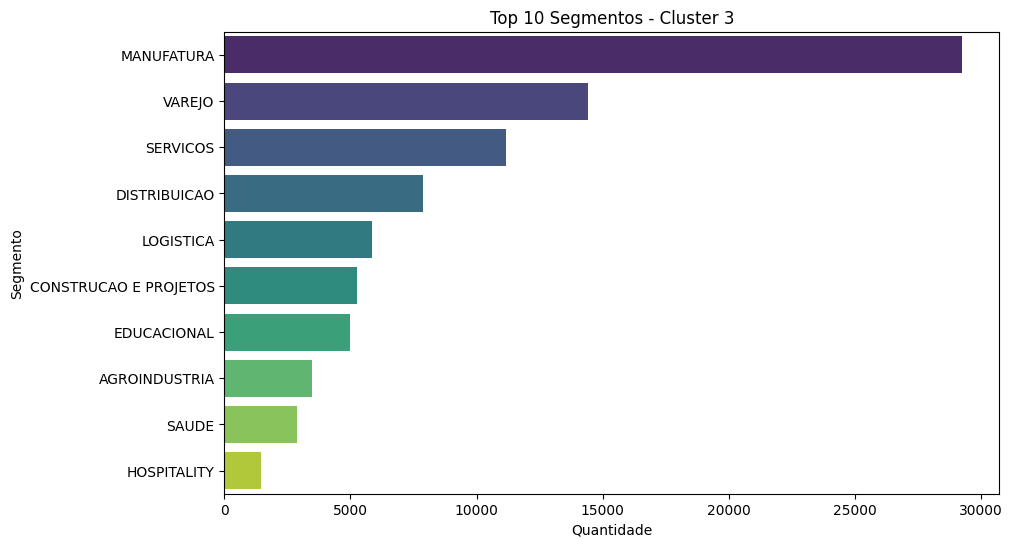

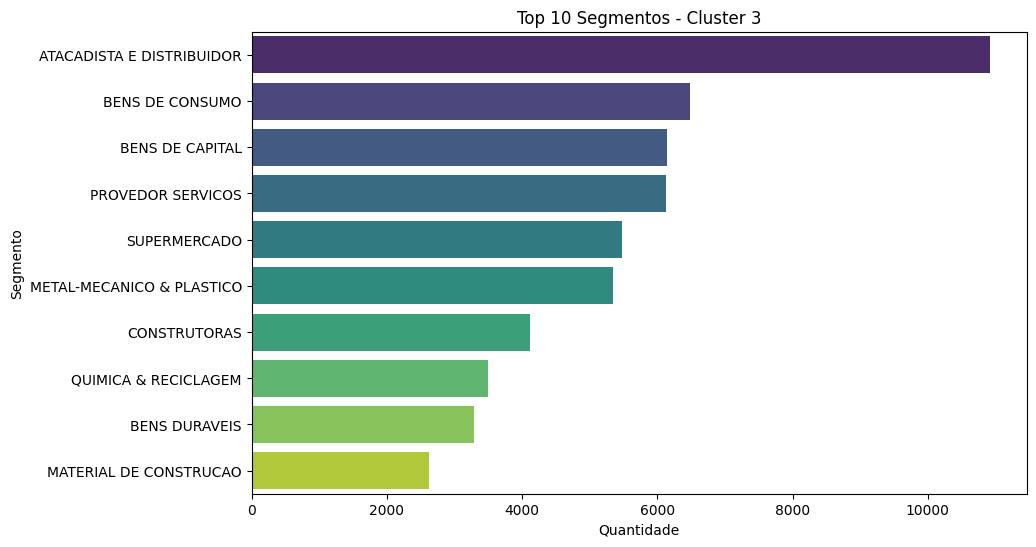

In [80]:
cluster = 3
df_cluster = df[df['HDBSCAN'] == cluster]

# Top 10 segmentos mais recorrentes
top10 = df_cluster['DS_SEGMENTO'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10.values, y=top10.index, palette="viridis")

plt.title(f"Top 10 Segmentos - Cluster {cluster}")
plt.xlabel("Quantidade")
plt.ylabel("Segmento")
plt.show()

# Top 10 subsegmentos mais recorrentes
top10 = df_cluster['DS_SUBSEGMENTO'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10.values, y=top10.index, palette="viridis")

plt.title(f"Top 10 Segmentos - Cluster {cluster}")
plt.xlabel("Quantidade")
plt.ylabel("Segmento")
plt.show()

# **Cluster 4**

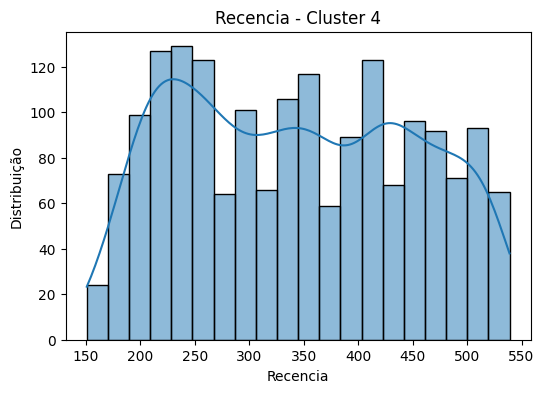

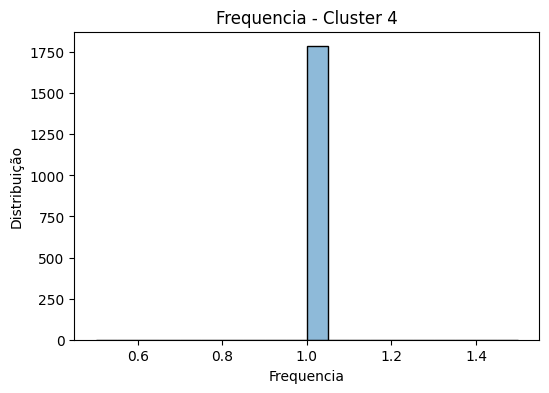

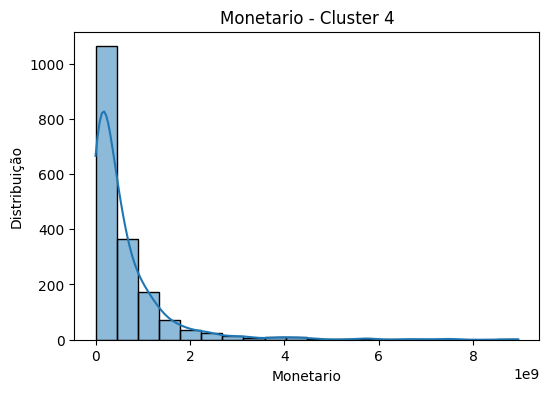

In [151]:
# Analisando distribuição variáveis chave para clusterização
variaveis = ['Recencia', 'Frequencia', 'Monetario']
cluster = 4

df_cluster = df_unicos[df_unicos['HDBSCAN'] == cluster]

for var in variaveis:
    plt.figure(figsize=(6,4))
    sns.histplot(df_cluster[var], bins=20, kde=True, edgecolor="black")
    plt.title(f"{var} - Cluster {cluster}")
    plt.xlabel(var)
    plt.ylabel("Distribuição")
    plt.show()

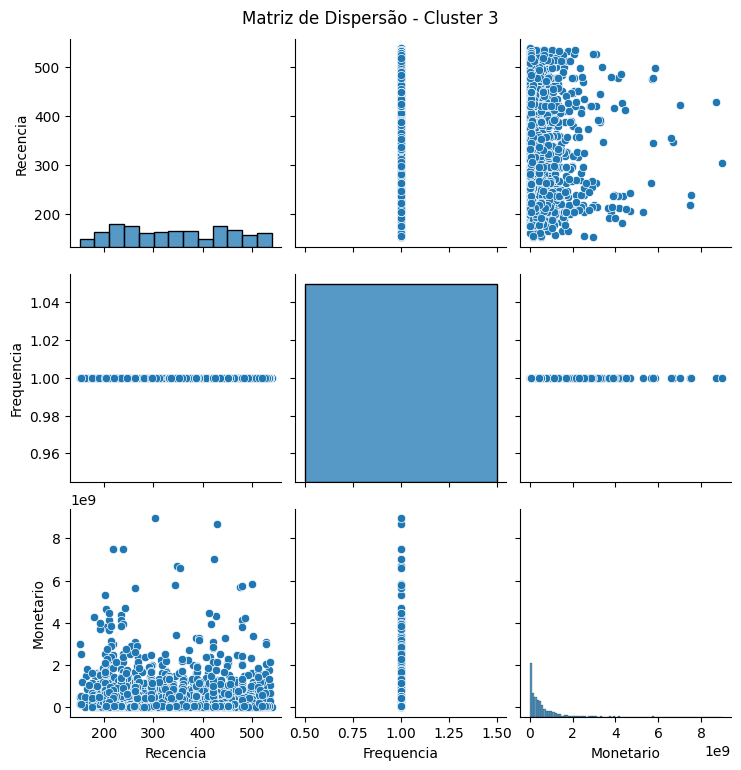

In [152]:
# Dispersões das variáveis chave do cluster 4
variaveis = ['Recencia', 'Frequencia', 'Monetario']
cluster = 4

df_cluster = df_unicos[df_unicos['HDBSCAN'] == cluster]

# Pairplot só para o cluster 3
sns.pairplot(df_cluster[variaveis])

plt.suptitle("Matriz de Dispersão - Cluster 3", y=1.02)
plt.show()

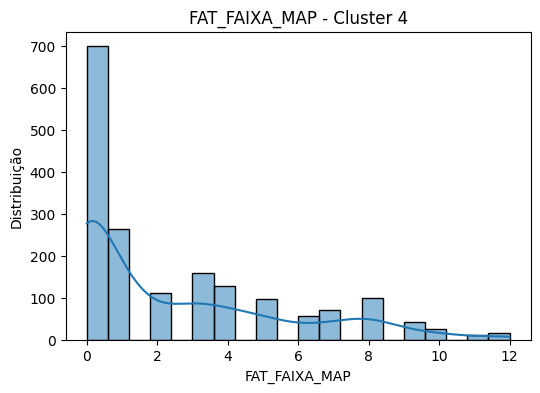

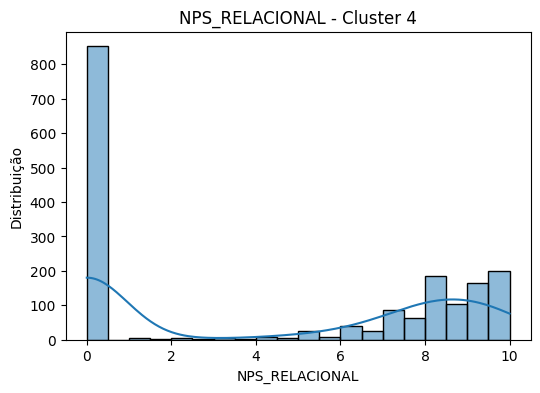

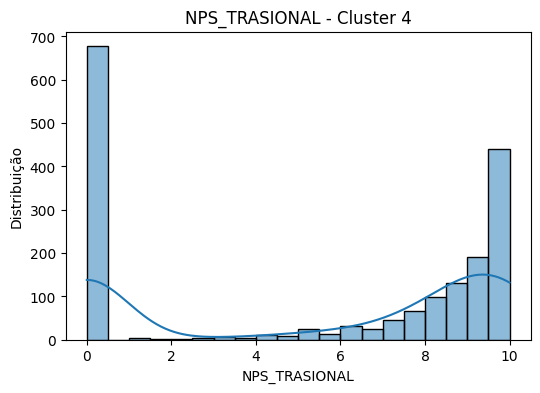

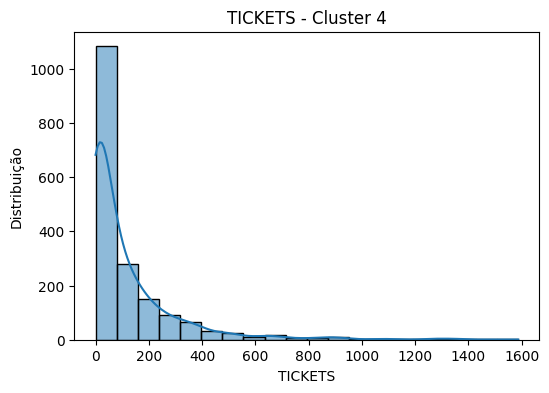

In [153]:
# Analisando outras variáveis chave para o negócio
variaveis = ['FAT_FAIXA_MAP', 'NPS_RELACIONAL', 'NPS_TRASIONAL', 'TICKETS']
cluster = 4

for var in variaveis:
    plt.figure(figsize=(6,4))
    sns.histplot(df_cluster[var], bins=20, kde=True, edgecolor="black")
    plt.title(f"{var} - Cluster {cluster}")
    plt.xlabel(var)
    plt.ylabel("Distribuição")
    plt.show()

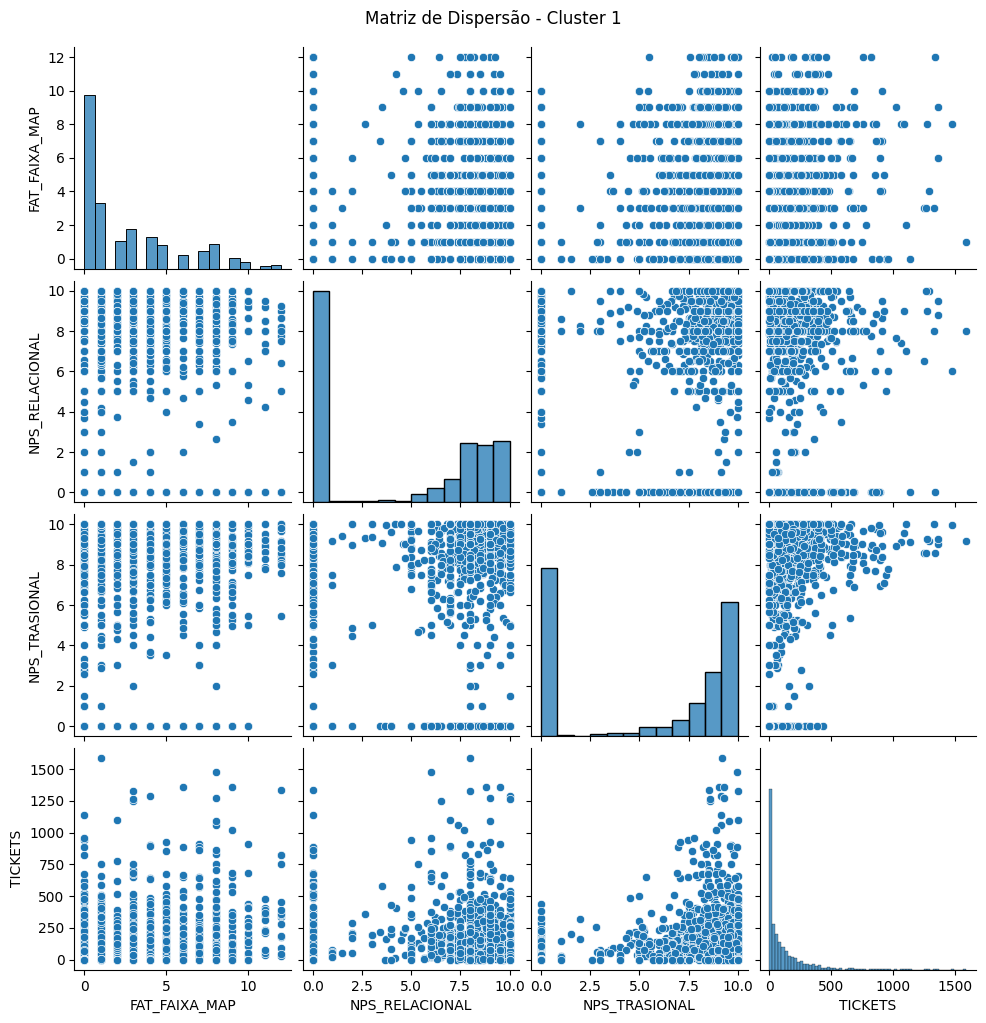

In [154]:
# Dispersões das outras variáveis chave para o negócio do cluster 3
variaveis = ['FAT_FAIXA_MAP', 'NPS_RELACIONAL', 'NPS_TRASIONAL', 'TICKETS']
cluster = 4

df_cluster = df_unicos[df_unicos['HDBSCAN'] == cluster]

sns.pairplot(df_cluster[variaveis])

plt.suptitle("Matriz de Dispersão - Cluster 1", y=1.02)
plt.show()

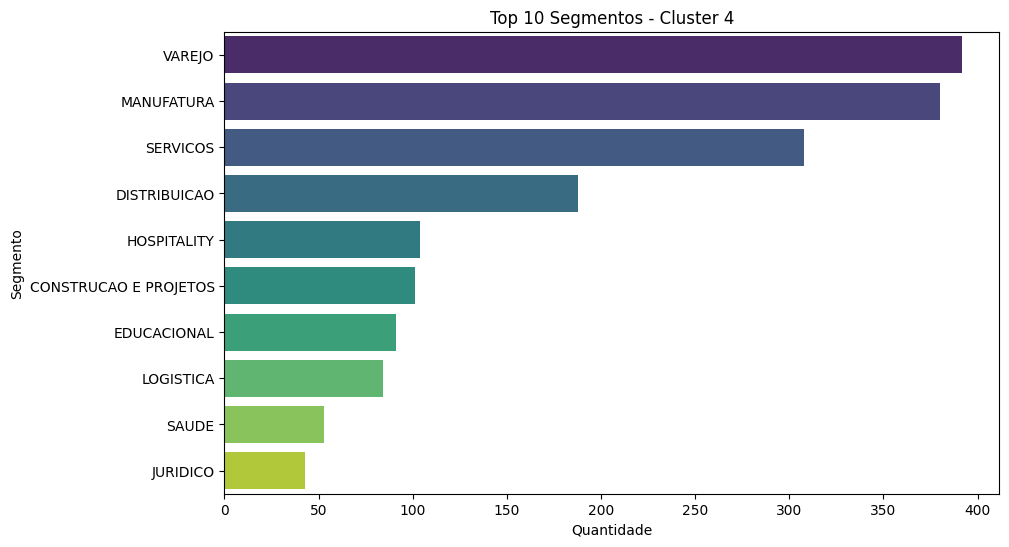

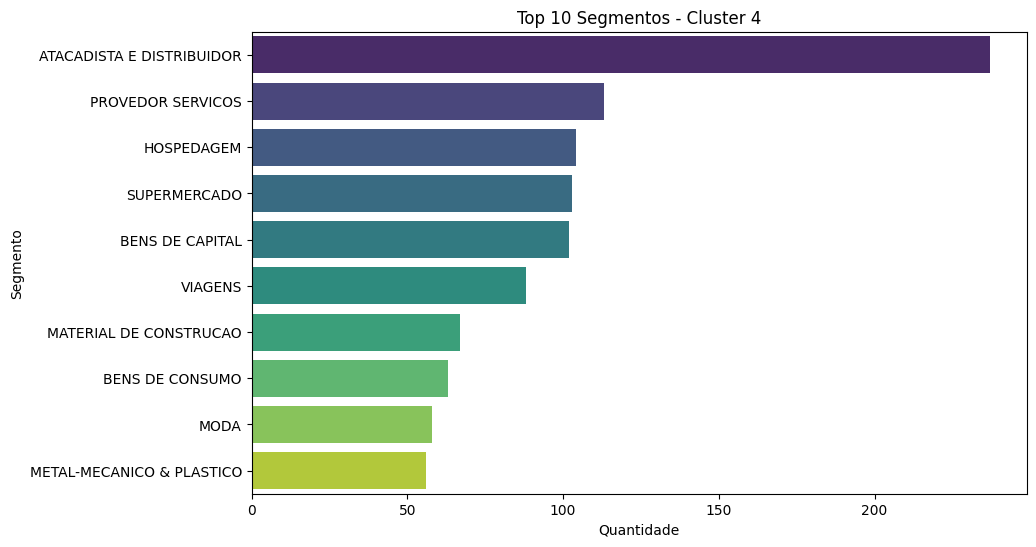

In [155]:
cluster = 4
df_cluster = df_unicos[df_unicos['HDBSCAN'] == cluster]

# Top 10 segmentos mais recorrentes
top10 = df_cluster['DS_SEGMENTO'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10.values, y=top10.index, palette="viridis")

plt.title(f"Top 10 Segmentos - Cluster {cluster}")
plt.xlabel("Quantidade")
plt.ylabel("Segmento")
plt.show()

# Top 10 subsegmentos mais recorrentes
top10 = df_cluster['DS_SUBSEGMENTO'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10.values, y=top10.index, palette="viridis")

plt.title(f"Top 10 Segmentos - Cluster {cluster}")
plt.xlabel("Quantidade")
plt.ylabel("Segmento")
plt.show()

# **Cluster -1 (Ruídos)**

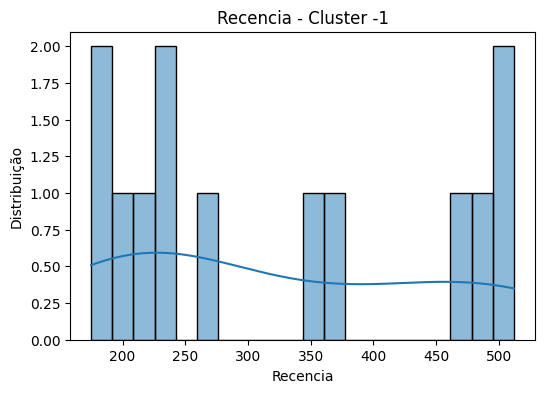

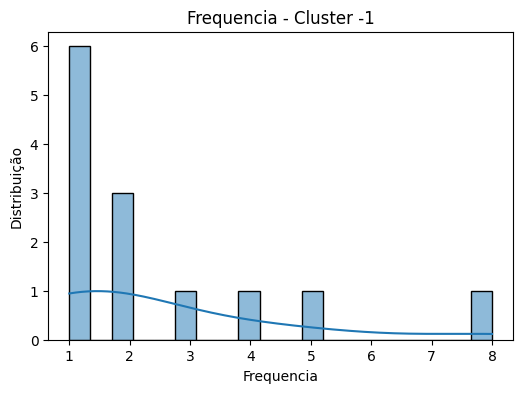

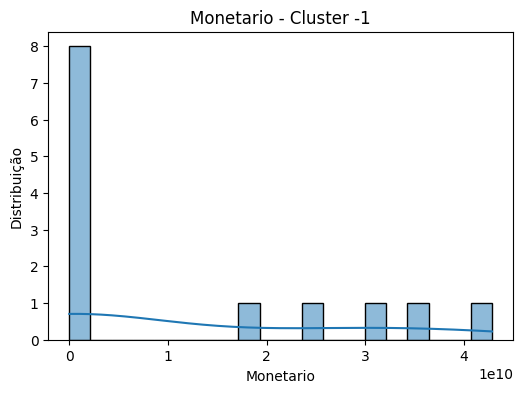

In [156]:
# Analisando distribuição variáveis chave para clusterização
variaveis = ['Recencia', 'Frequencia', 'Monetario']
cluster = -1

df_cluster = df_unicos[df_unicos['HDBSCAN'] == cluster]

for var in variaveis:
    plt.figure(figsize=(6,4))
    sns.histplot(df_cluster[var], bins=20, kde=True, edgecolor="black")
    plt.title(f"{var} - Cluster {cluster}")
    plt.xlabel(var)
    plt.ylabel("Distribuição")
    plt.show()

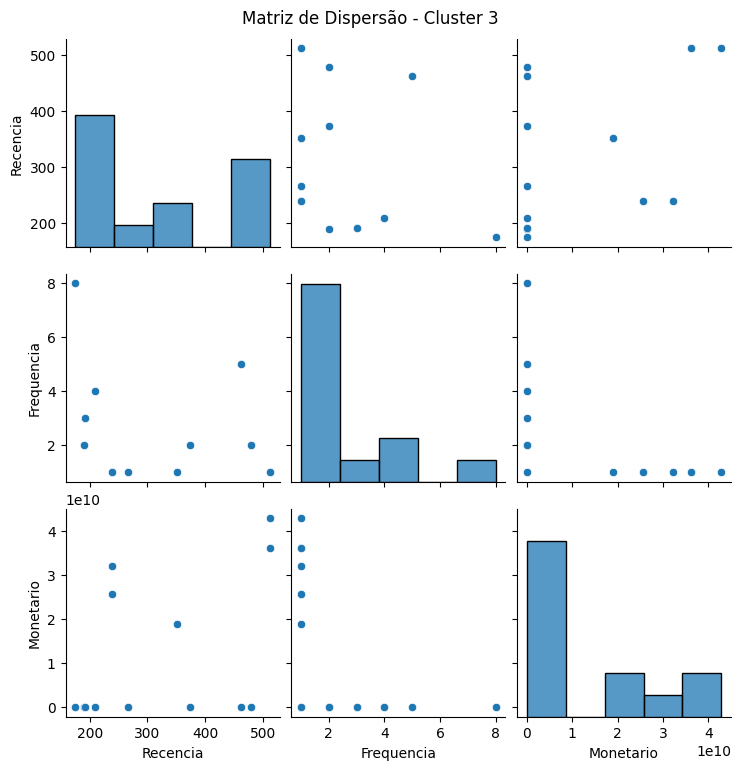

In [157]:
# Dispersões das variáveis chave do cluster 3
variaveis = ['Recencia', 'Frequencia', 'Monetario']
cluster = -1

df_cluster = df_unicos[df_unicos['HDBSCAN'] == cluster]

# Pairplot só para o cluster 3
sns.pairplot(df_cluster[variaveis])

plt.suptitle("Matriz de Dispersão - Cluster 3", y=1.02)
plt.show()

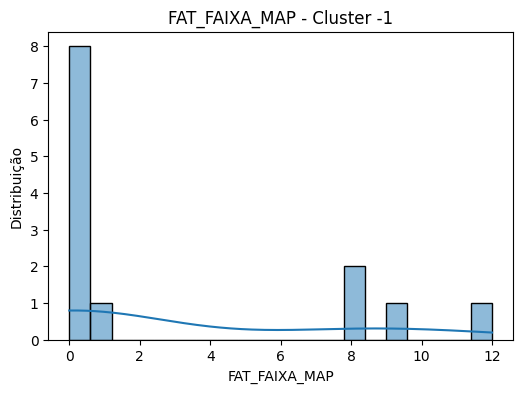

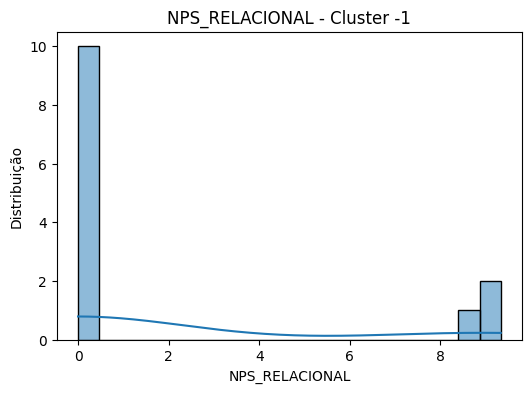

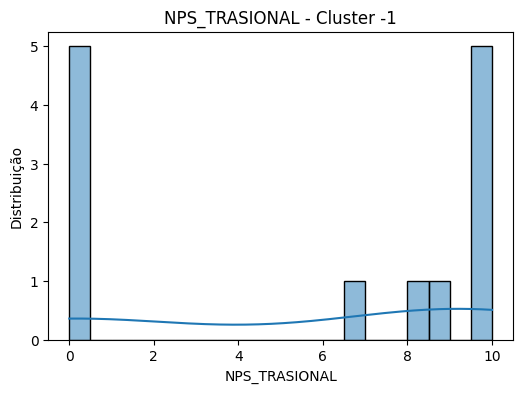

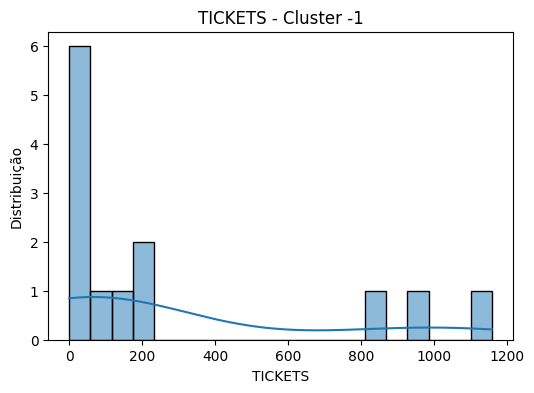

In [158]:
# Analisando outras variáveis chave para o negócio
variaveis = ['FAT_FAIXA_MAP', 'NPS_RELACIONAL', 'NPS_TRASIONAL', 'TICKETS']
cluster = -1

for var in variaveis:
    plt.figure(figsize=(6,4))
    sns.histplot(df_cluster[var], bins=20, kde=True, edgecolor="black")
    plt.title(f"{var} - Cluster {cluster}")
    plt.xlabel(var)
    plt.ylabel("Distribuição")
    plt.show()

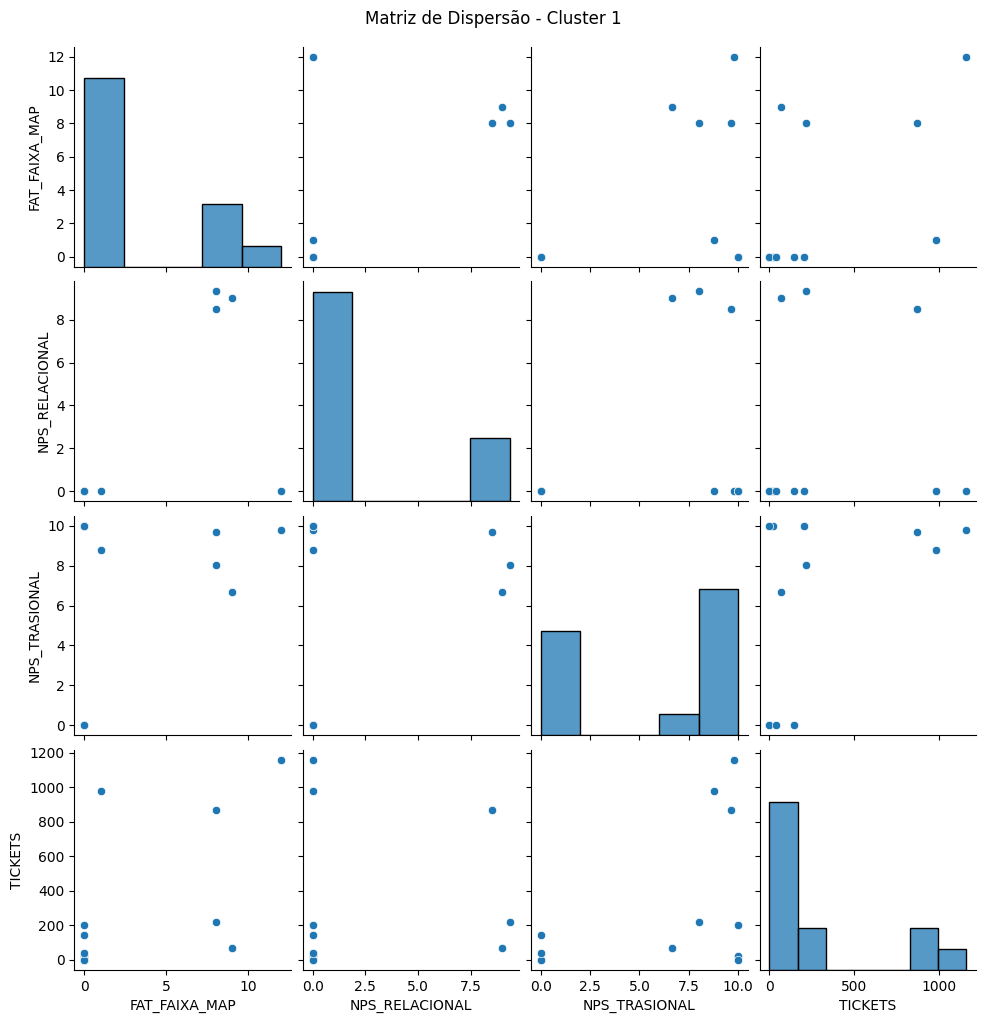

In [159]:
# Dispersões das outras variáveis chave para o negócio do cluster -1
variaveis = ['FAT_FAIXA_MAP', 'NPS_RELACIONAL', 'NPS_TRASIONAL', 'TICKETS']
cluster = -1

df_cluster = df_unicos[df_unicos['HDBSCAN'] == cluster]

sns.pairplot(df_cluster[variaveis])

plt.suptitle("Matriz de Dispersão - Cluster 1", y=1.02)
plt.show()

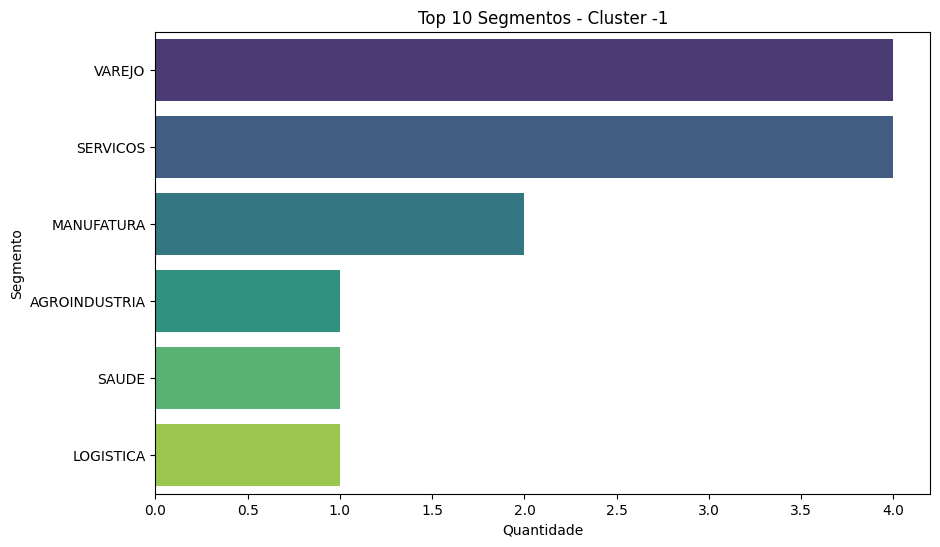

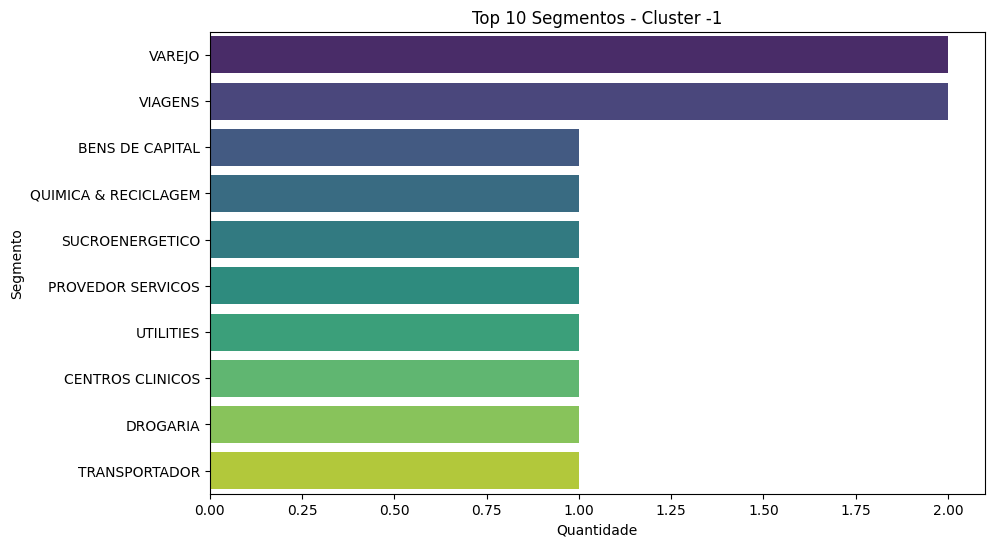

In [160]:
cluster = -1
df_cluster = df_unicos[df_unicos['HDBSCAN'] == cluster]

# Top 10 segmentos mais recorrentes
top10 = df_cluster['DS_SEGMENTO'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10.values, y=top10.index, palette="viridis")

plt.title(f"Top 10 Segmentos - Cluster {cluster}")
plt.xlabel("Quantidade")
plt.ylabel("Segmento")
plt.show()

# Top 10 subsegmentos mais recorrentes
top10 = df_cluster['DS_SUBSEGMENTO'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10.values, y=top10.index, palette="viridis")

plt.title(f"Top 10 Segmentos - Cluster {cluster}")
plt.xlabel("Quantidade")
plt.ylabel("Segmento")
plt.show()